In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([32062, 32063]), array([47, 47]))
-0.0004625995456713424


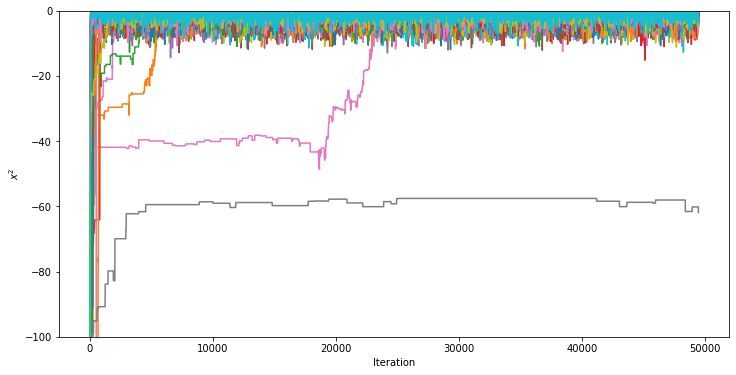

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

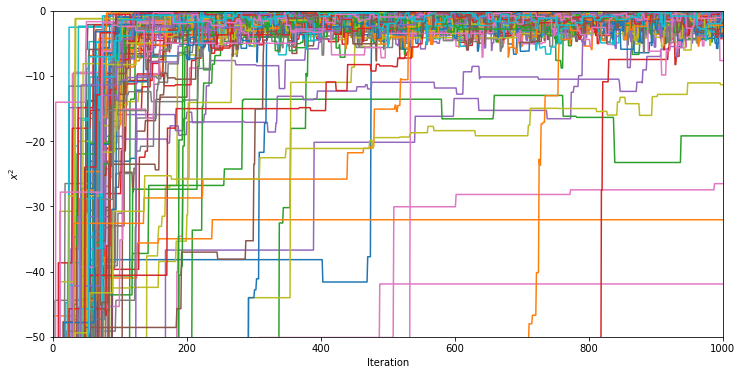

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([8126., 8184., 8167., 8060., 8063., 8165., 8190.,   12., 8223.,
       8160., 7894., 8025., 8212., 8100., 8260., 8240., 7823., 8073.,
       8090., 8099., 8186., 8060., 8018., 8208., 8030., 8228., 8111.,
       8316., 7921., 8155., 8123., 8205., 7242., 8078., 8053., 8226.,
       8085., 7733., 7789., 7904., 8160., 7834., 8094., 8159., 7976.,
       7855., 8190., 8063., 8147., 8002., 8052., 7350., 8101., 8339.,
       8170., 8315., 4655., 8046., 8086., 8214., 7906., 8130., 8305.,
       8222., 7996., 8093., 7943., 8132., 8094., 8022., 7888., 8001.,
       8101., 8015., 8095., 8045., 8084., 8143., 7910., 7943., 8026.,
       8174., 8153., 8102., 8072., 8167., 8003., 8042., 7871., 8092.,
       8030., 7976., 7965., 8063., 8047., 7861., 8137., 8215., 8258.,
       8173., 8232., 8141., 8165., 8182., 8103., 8014., 8039., 8192.,
       8045., 8175., 8023., 7994., 7893., 8052., 8211., 8062., 7982.,
         46., 7767., 8270.])

[232.16543757 126.18695692  46.75933366  51.79592546]
flat chain shape: (600, 4)
flat log prob shape: (600,)


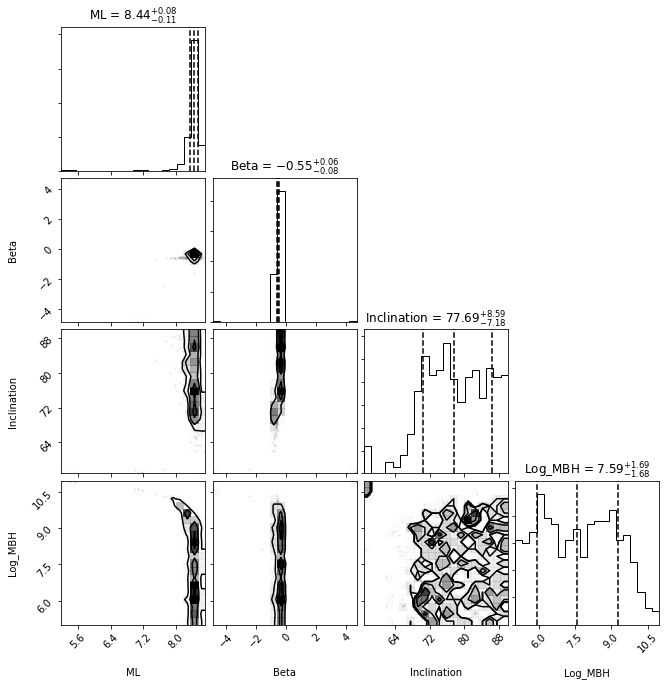

In [8]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=5000, flat=True, thin=8000 )
log_prob_samples = read.get_log_prob(discard=5000,flat=True, thin=8000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

464 116
flat chain shape: (50640, 4)
flat log prob shape: (50640,)


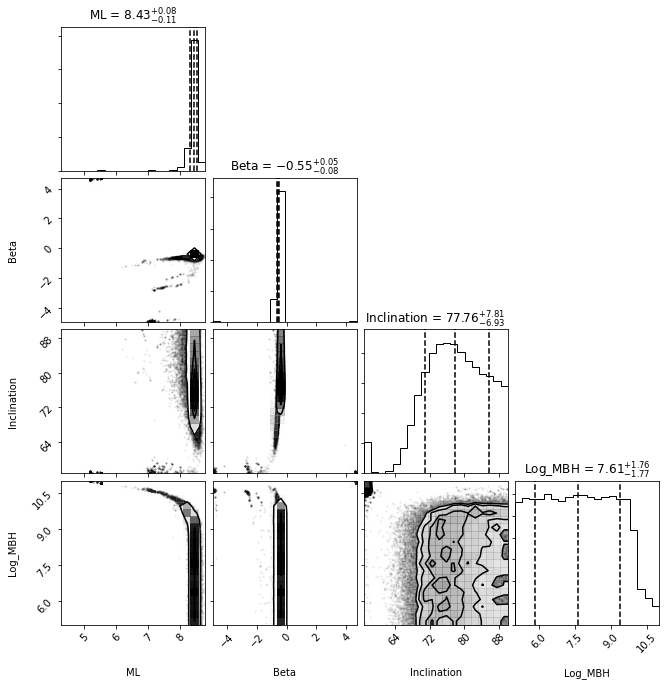

In [10]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [11]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
tau = read.get_autocorr_time()
tau

array([232.16543757, 126.18695692,  46.75933366,  51.79592546])

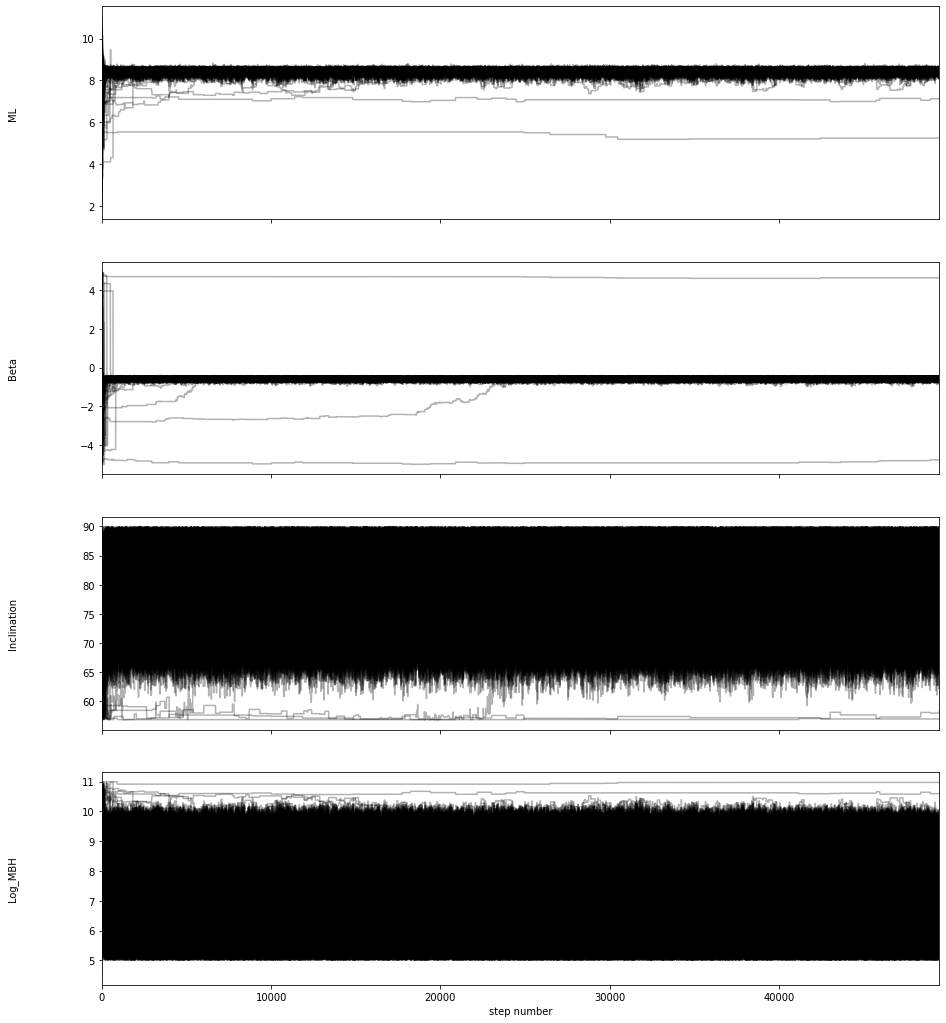

In [13]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [14]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

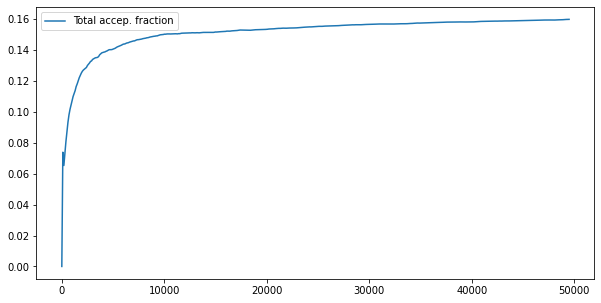

In [15]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

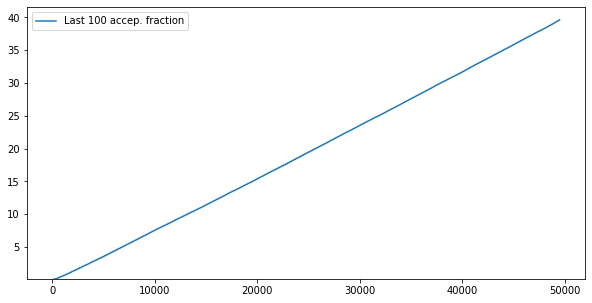

In [16]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [17]:
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class
from astropy.cosmology import Planck15 as cosmo

In [18]:
xbin, ybin, rms, goodbins      = np.loadtxt("vrms_data.txt", unpack=True)   #dynamical data
surf_lum, sigma_lum, qobs_lum  = np.loadtxt("JAM_Input.txt", unpack=True)   #mge decomposition
normpsf, sigmapsf              = np.loadtxt("MUSE_Psf_model.txt", unpack=True)         #psf

goodbins = goodbins == 1
pixsize  = 0.2

z_l    = 0.299                                            #Redshift
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to Lens [Mpc] 

In [ ]:
ML=8.4300.082−0.107
Beta=−0.5500.052−0.081
Inclination=77.7597.814−6.925
LogMBH=7.6141.757−1.767

In [19]:
#Best fit

best_ml      = 8.430
best_beta    = np.full_like(surf_lum, -0.550)
best_inc     = 77.759
best_log_mbh = 7.614

/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: divide by zero encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')
/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: invalid value encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')


jam_axi_rms elapsed time sec: 0.31
inc=77.8 beta_z=-0.55 M/L=1 BH=4.11e+07 chi2/DOF=0.000552
Total mass MGE: 7.346e+11


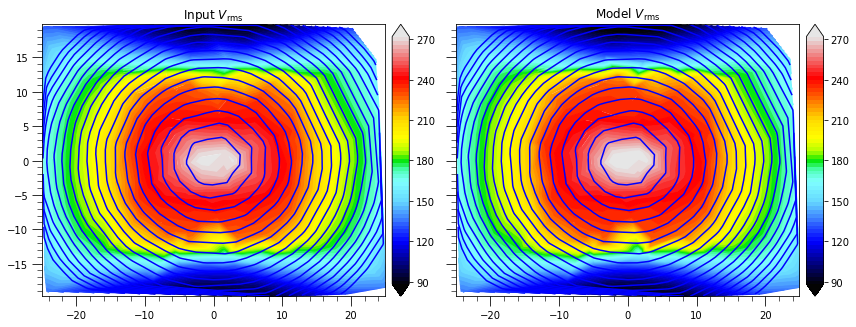

In [20]:
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= best_inc, distance=D_l, mbh=10**(best_log_mbh), rms=rms,
                    beta=best_beta, normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

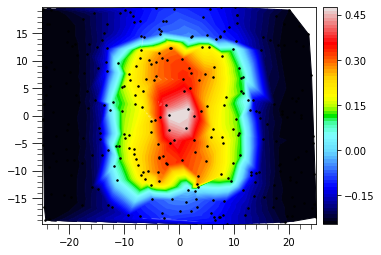

In [21]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

In [22]:
print("Chi2/DOF:",chi2)
print("Chi2 Total", chi2T)

Chi2/DOF: 0.0005520181620818521
Chi2 Total 0.16560544862455562
